The number of required iterations: 90
The value of the objective function at convergence: 310.93344862069233


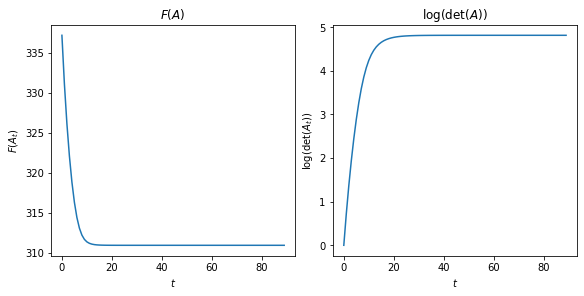

In [4]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

def func_F(A, B, c):
    A_A_inv = A - torch.inverse(A)
    term_1 = (c/2) * torch.trace(torch.mm(torch.transpose(A_A_inv, 0, 1), A_A_inv))
    A_B = A - B
    term_2 = (1/2) * torch.trace(torch.mm(torch.transpose(A_B, 0, 1), A_B))
    return term_1 + term_2

def grad_F(A, B, c):
    A_A_inv = A - torch.inverse(A)
    A_tr_inv = torch.transpose(torch.inverse(A), 0, 1)
    return c*(torch.mm(torch.mm(A_tr_inv, A_A_inv), A_tr_inv) - torch.inverse(A)) + (1+c) * A - B

def check_tmn(grad_F):
    for row in grad_F:
        for entry in row:
            if torch.abs(entry) > 1e-8:
                return False
    return True

if __name__ == "__main__":
    c, alpha = 5, 0.01
    B = pd.read_csv('homework1_data/B.csv')
    B = B.drop(['Unnamed: 0'], axis=1).to_numpy()
    B = torch.tensor(B)
    A = torch.eye(25).double()
    T = 0
    list_t, list_f, list_logdet = [], [], []
    while True:
        grad_tmp = grad_F(A, B, c)
        if check_tmn(grad_tmp) is True:
            break
        else:
            f_tmp = func_F(A, B, c)
            list_f.append(f_tmp)
            list_logdet.append(torch.log(torch.det(A)))
            list_t.append(T)
            A -= alpha * torch.mm(torch.mm(grad_tmp, torch.transpose(A, 0, 1)), A)
            T += 1

    print("The number of required iterations: " + str(T))
    print("The value of the objective function at convergence: " + str(list_f[T-1].item()))

    fig, axs = plt.subplots(1, 2, figsize = (8, 4), constrained_layout=True)

    axs[0].plot(list_t, list_f)
    axs[0].set_xlabel(r'$t$')
    axs[0].set_ylabel(r'$F(A_t)$')
    axs[0].set_title(r'$F(A)$')

    axs[1].plot(list_t, list_logdet)
    axs[1].set_xlabel(r'$t$')
    axs[1].set_ylabel(r'$\log(\det(A_t))$')
    axs[1].set_title(r'$\log(\det(A))$')

    plt.savefig("3.3.pdf")